# Adi Oizerovich
### 211872114

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Create a dataset with inputs corresponding to XOR

In [24]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([-1, 1, 1, -1])  # Labels for XOR

# Initialization
### Randomly initialize the parameters and define ReLU functions

In [25]:
# Hyperparameters
learning_rate = 0.01
epochs = 1000
initializations = 10  # Number of random initializations
best_loss = float('inf')
# variables to store the best run:
best_params = None
best_losses = None
best_w1_eval = None
best_b2_eval = None 

# Define ReLU function and its gradient function
def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return (x > 0).astype(float)

# Training stage

### For each epoch:

1. Perform a forward pass to compute the hidden layer output (\( h \)) and the model output (\( f(x) \)).
2. Compute the squared loss
3. Backpropagate the error to compute gradients of the loss with respect to all parameters.
4. Update the parameters using gradient descent.

In [ ]:
for init in range(initializations):
    # Randomly initialize parameters for each run
    np.random.seed(init)  # Use a different seed for each initialization
    U = np.random.randn(2, 2)
    b1 = np.random.randn(2)
    w = np.random.randn(2)
    b2 = np.random.randn(1)[0]

    # Lists to store loss values and parameters
    losses = []
    w1_eval = []
    b2_eval = []

    # Training
    for epoch in range(epochs):
        total_loss = 0
        grad_U = np.zeros_like(U)
        grad_b1 = np.zeros_like(b1)
        grad_w = np.zeros_like(w)
        grad_b2 = 0

        for i in range(len(X)):
            ### Forward pass ###
            h = relu(U.T @ X[i] + b1)
            f = w.T @ h + b2

            ### Compute squared loss ###
            loss = (y[i] - f) ** 2
            total_loss += loss

            ### Backpropagation ###
            grad_f = -2 * (y[i] - f)
            # Gradients for the Output Layer
            grad_w += grad_f * h # Gradients with respect to w 
            grad_b2 += grad_f # Gradients with respect to b2
            # Gradients for the Hidden Layer
            z = U.T @ X[i] + b1
            grad_h = grad_f * w # Gradients with respect to h 
            grad_U += np.outer(grad_h * relu_grad(z), X[i].T) # Gradients with respect to U
            grad_b1 += grad_h * relu_grad(z) # Gradients with respect to b1

        ### Update parameters ###
        U -= learning_rate * grad_U
        b1 -= learning_rate * grad_b1
        w -= learning_rate * grad_w
        b2 -= learning_rate * grad_b2

        losses.append(total_loss / len(X))
        w1_eval.append(w[0])
        b2_eval.append(b2)

    # Check if this run produced the best model
    if losses[-1] < best_loss:
        best_loss = losses[-1]
        best_params = (U, b1, w, b2)
        best_losses = losses
        best_w1_eval = w1_eval
        best_b2_eval = b2_eval

# Retrieve the best parameters
U, b1, w, b2 = best_params

# Final Loss
print(f"Best Loss: {best_loss}")

Best Loss: 0.5


# Plot Results

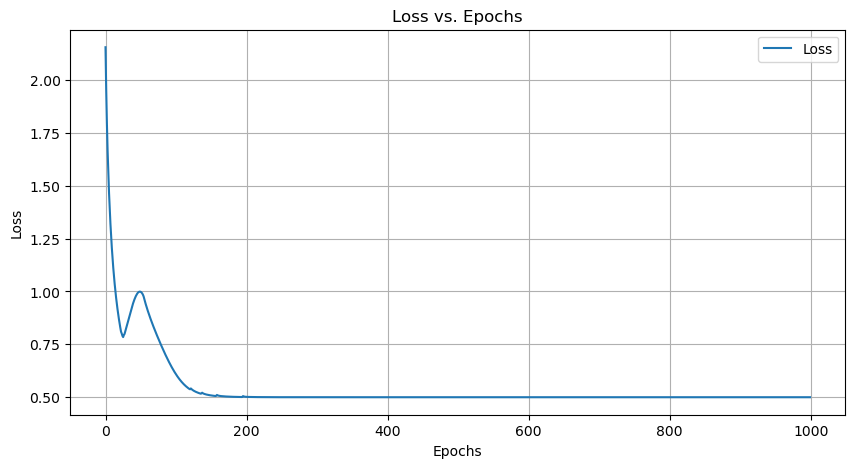

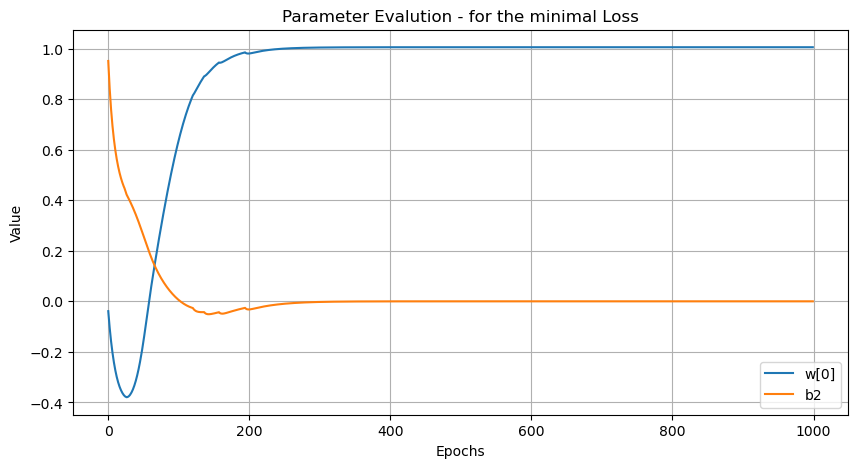

In [27]:
# Plot Loss vs Epochs for the best run
plt.figure(figsize=(10, 5))
plt.plot(best_losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Plot Evolution of w[0] and b2 for the best run
plt.figure(figsize=(10, 5))
plt.plot(best_w1_eval, label="w[0]")
plt.plot(best_b2_eval, label="b2")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Parameter Evalution - for the minimal Loss")
plt.legend()
plt.grid(True)
plt.show()
